In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import re

from scipy.stats import hmean
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import norm

import string
import html
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv('/Users/alenjose/Desktop/data/project_data/self-scraped/processed/test_df')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41743 entries, 0 to 41742
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             41743 non-null  int64  
 1   date                   41743 non-null  object 
 2   year                   41743 non-null  int64  
 3   month                  41743 non-null  int64  
 4   tweet_text_with_sw     41743 non-null  object 
 5   tweet_text_without_sw  41743 non-null  object 
 6   user_name              41743 non-null  object 
 7   user_id                41743 non-null  float64
 8   user_follower_count    41743 non-null  int64  
 9   user_friend_count      41743 non-null  int64  
 10  user_statuses_count    41743 non-null  int64  
 11  tweet_reply_count      41743 non-null  int64  
 12  tweet_retweet_count    41743 non-null  int64  
 13  tweet_like_count       41743 non-null  int64  
 14  tweet_quote_count      41743 non-null  int64  
 15  tw

In [47]:
# first 5 rows
df.head()

Unnamed: 0                           date  year  month  \
0           1  2021-03-23 10:27:38.540305625  2021      3   
1           4  2022-05-24 08:51:10.357066577  2022      5   
2           6  2021-08-30 20:15:29.555728463  2021      8   
3           7  2022-12-12 13:11:13.285477333  2022     12   
4           9  2021-03-29 22:19:13.348853845  2021      3   

                                  tweet_text_with_sw  \
0  someone needs to check the keepers betway account   
1  consequences imagine that except at blm antifa...   
2  during the blm riots in the summer of and beyo...   
3  why didnt he say this to blm and the other act...   
4  guess yours has seen some shit its in his line...   

                               tweet_text_without_sw     user_name  \
0         someone needs check keepers betway account    ArsenalBLM   
1  consequences imagine that except blm antifa ri...   Apodroplane   
2  during blm riots summer beyond eric adams de b...    GabNYC2021   
3                        why didnt say blm activists       JCJ45LC   
4                      guess seen shit its line work  chiisaistars   

        user_id  user_follower_count  user_friend_count  user_statuses_count  \
0  1.293480e+18                  181                512                  229   
1  1.430000e+18                    9                204                  735   
2  3.658613e+07                  840               1340                11830   
3  5.653508e+08                  517               1450                 3002   
4  1.553117e+09                 2016               1078                64160   

   tweet_reply_count  tweet_retweet_count  tweet_like_count  \
0                  0                    0                 0   
1                  0                    0                 0   
2                  0                    0                 0   
3                  0                    0                 0   
4                  0                    0                 0   

   tweet_quote_count tweet_language  \
0                  0             en   
1                  0             en   
2                  0             en   
3                  0             en   
4                  0             en   

                               tweet_mentioned_users sentiments  
0                                                NaN   negative  
1  [User(username='ProudElephantUS', id=810055220...   negative  
2                                                NaN   positive  
3                                                NaN   positive  
4  [User(username='Baronduki', id=369819699, disp...   negative

In [48]:
# last 5 rows
df.tail()

Unnamed: 0                           date  year  month  \
41738       93965  2021-07-25 06:11:44.878065183  2021      7   
41739       93967  2021-11-06 10:21:59.962496728  2021     11   
41740       93970  2022-09-18 12:34:34.003217510  2022      9   
41741       93972  2021-07-13 08:51:05.276020045  2021      7   
41742       93973  2021-06-11 08:48:19.736205407  2021      6   

                                      tweet_text_with_sw  \
41738                              that would be awesome   
41739                    that the guilty part kicking in   
41740                             my emojis say see them   
41741  so you don like him pointing out the hypocriti...   
41742                                               yeah   

                                   tweet_text_without_sw      user_name  \
41738                                      would awesome    GainesUriel   
41739                        that guilty part kicking in    MaverickBLM   
41740                                  my emojis say see     KidCreole3   
41741  so like pointing hypocritical idiocy show blm ...        VelkJay   
41742                                               yeah  Asagiri_Gennn   

            user_id  user_follower_count  user_friend_count  \
41738  2.325023e+09                  632               1375   
41739  9.877310e+17                  747                518   
41740  1.260250e+18                 4114               1751   
41741  1.575650e+18                  136                320   
41742  1.152110e+18                  240                235   

       user_statuses_count  tweet_reply_count  tweet_retweet_count  \
41738                92346                  1                    0   
41739                25831                  0                    0   
41740                63341                  1                    0   
41741                 6198                  0                    0   
41742                51776                  0                    0   

       tweet_like_count  tweet_quote_count tweet_language  \
41738                 1                  0             en   
41739                 1                  0             en   
41740                 0                  0             en   
41741                 1                  0             en   
41742                 1                  0             en   

                                   tweet_mentioned_users sentiments  
41738  [User(username='Y2Kween', id=1646402437, displ...   positive  
41739  [User(username='BGCallisto', id=1043770812, di...   positive  
41740  [User(username='JesseJa00920812', id=118377823...   negative  
41741  [User(username='WalshFreedom', id=236487888, d...   negative  
41742  [User(username='MayaCounty', id=13071846065385...   negative

In [49]:
# 0 - negative and 4 - positive
df['sentiments'].value_counts()

positive    22670
negative    19073
Name: sentiments, dtype: int64

# Data Visualization : 

## https://www.datacamp.com/tutorial/wordcloud-python

In [17]:
df.rename(columns={'sentiments':'target','tweet_text_without_sw':'tweet_text'},inplace=True)

In [21]:
df.target = df.target.replace({'negative':0,'positive':4})

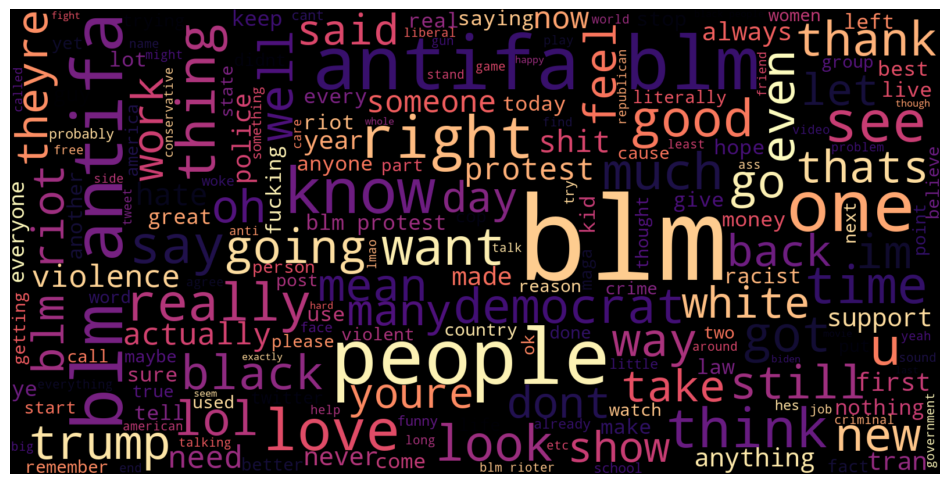

In [22]:
positive_text = []

def add_to_list(tweet):
    for word in tweet.split():
        positive_text.append(word)
        
df[df['target']==4].tweet_text.apply(lambda x:add_to_list(x))

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(' '.join(positive_text))

# Display the generated image:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

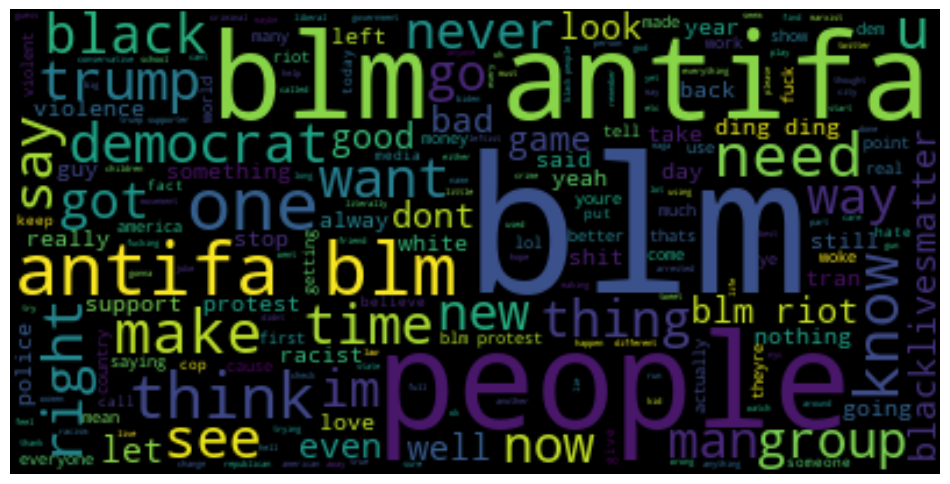

In [23]:
negative_text = []

def add_to_list(tweet):
    for word in tweet.split():
        negative_text.append(word)
        
df[df['target']==0].tweet_text.apply(lambda x:add_to_list(x))

wordcloud = WordCloud().generate(' '.join(negative_text))

# Display the generated image:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

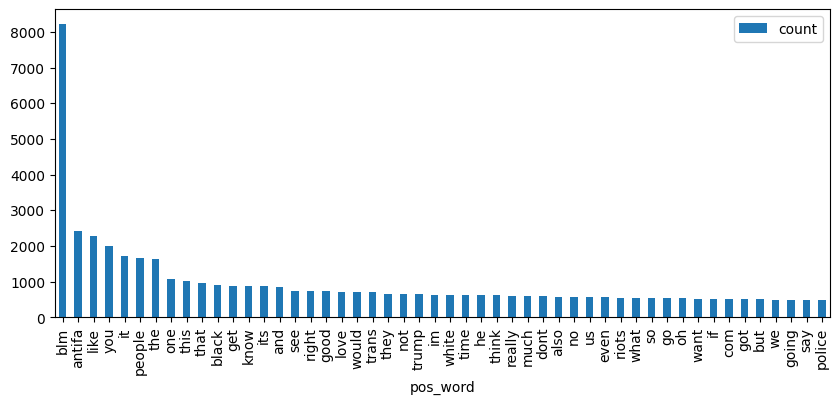

In [24]:
pos_count = {}
for word in positive_text:
    if word not in pos_count:
        pos_count[word] = 1
    elif word in pos_count:
        pos_count[word] += 1
# print(pos_count)

# https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe
pos_term_df = pd.DataFrame(pos_count.items(),columns=['pos_word','count']).sort_values(by='count',ascending=False)
pos_term_df[:50].plot(x='pos_word',kind='bar',figsize=(10,4))
plt.show()

<AxesSubplot: xlabel='neg_word'>

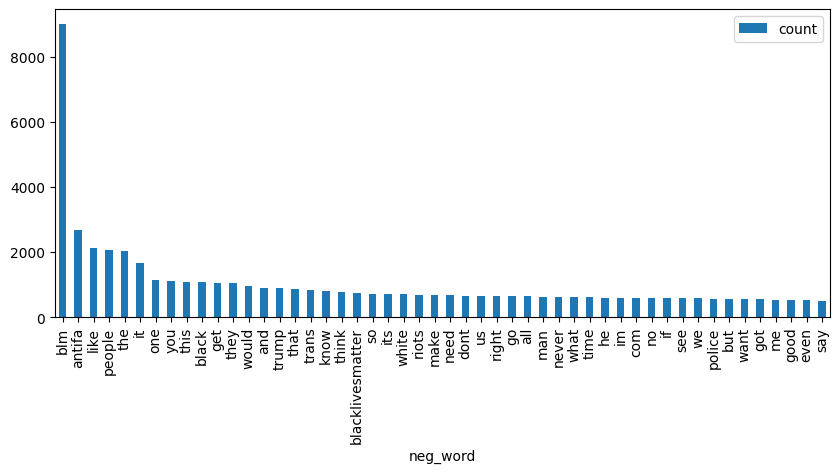

In [25]:
neg_count = {}
for word in negative_text:
    if word not in neg_count:
        neg_count[word] = 1
    elif word in neg_count:
        neg_count[word] += 1
# print(neg_count)

neg_term_df = pd.DataFrame(neg_count.items(),columns=['neg_word','count']).sort_values(by='count',ascending=False)
neg_term_df[:50].plot(x='neg_word',kind='bar',figsize=(10,4))

# Feature Extraction and summarization : 

In [26]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
cvec = CountVectorizer()
cvec.fit(df.tweet_text)

# cvec - count vectorizer
neg_matrix = cvec.transform(df[df.target == 0].tweet_text)
pos_matrix = cvec.transform(df[df.target == 4].tweet_text)

neg_df = np.sum(neg_matrix,axis=0)
pos_df = np.sum(pos_matrix,axis=0)

negative = np.squeeze(np.asarray(neg_df))
positive = np.squeeze(np.asarray(pos_df))

term_freq = pd.DataFrame([negative,positive],columns=cvec.get_feature_names_out()).transpose()

# token and its occurance in both classes (0-negative, 1-positive)
term_freq.head()

0  1
aa      2  4
aaa     1  1
aaaa    2  0
aaaaa   2  1
aaaaaa  0  1

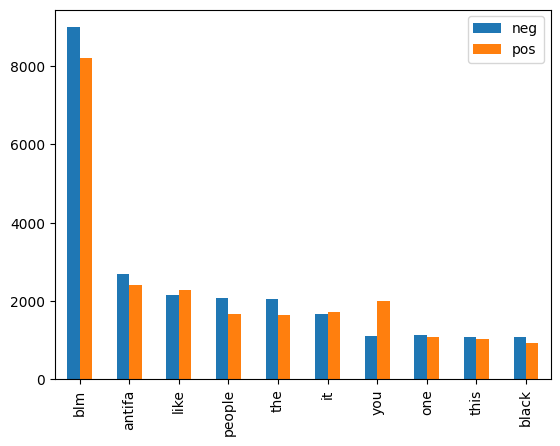

In [27]:
# renaming the columns
term_freq.columns = ['neg','pos']

# a df with index as tokens and columns as occurance of token (in both target strings)
term_freq['total_count'] = term_freq['neg'] + term_freq['pos']

term_freq.sort_values(by='total_count', ascending=False).iloc[:10][['neg','pos']].plot(kind='bar')
plt.show()

<!--  -->

### It is clear from this plot that the most common words associated with both positive and negative tweets are words that contain no meaning (including stop words).  This could affect the model we intend to train.

# Removing stopwords and setting max_features to 10,000 

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(df.tweet_text)

CountVectorizer(max_features=10000, stop_words='english')

In [29]:
# cvec - count vectorizer
neg_matrix_1 = cvec.transform(df[df.target == 0].tweet_text)
pos_matrix_1 = cvec.transform(df[df.target == 4].tweet_text)

neg_df_1 = np.sum(neg_matrix_1,axis=0)
pos_df_1 = np.sum(pos_matrix_1,axis=0)

negative_1 = np.squeeze(np.asarray(neg_df_1))
positive_1 = np.squeeze(np.asarray(pos_df_1))

term_freq_1 = pd.DataFrame([negative_1,positive_1],columns=cvec.get_feature_names_out()).transpose()

# token and its occurance in both classes (0-negative, 1-positive)
term_freq_1.head()

0  1
aa       2  4
aaaaaaa  3  1
aab      1  3
ab       9  5
abandon  1  4

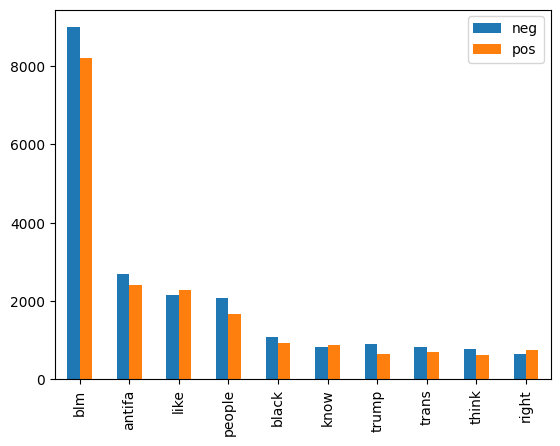

In [30]:
# renaming the columns
term_freq_1.columns = ['neg','pos']

# a df with index as tokens and columns as occurance of token (in both target strings)
term_freq_1['total_count'] = term_freq_1['neg'] + term_freq_1['pos']

term_freq_1.sort_values(by='total_count', ascending=False).iloc[:10][['neg','pos']].plot(kind='bar')
plt.show()

## removing the stopwords made some improvements to the plot. It would also be better to remove the top 10-15 words found from the previous plot that wasnt included in the stopwords although there is a high probability that the stopwords from sklearn should contain all those words

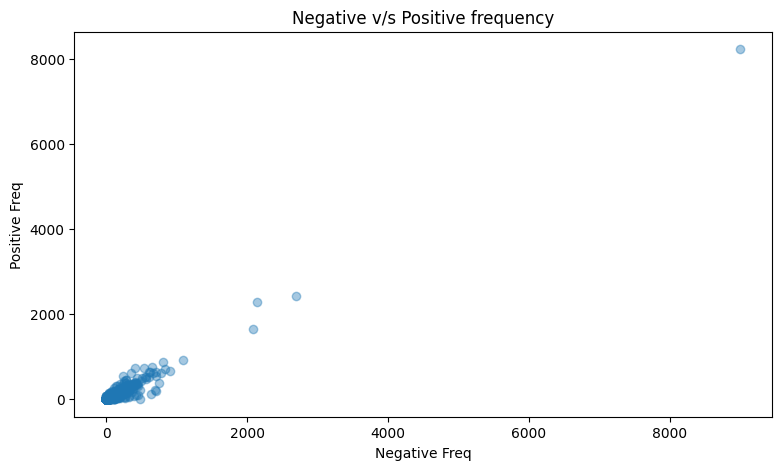

In [31]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
plt.figure(figsize=(9,5))
ax = sns.regplot(x="neg", y="pos",fit_reg=False, scatter_kws={'alpha':0.4},data=term_freq_1)
plt.ylabel('Positive Freq')
plt.xlabel('Negative Freq')
plt.title('Negative v/s Positive frequency')
plt.show()

## This plot isnt meaningful and there is no clear distinction between the positive and negative terms frequency. 
## We need to use some kind of metric that can detect important tokens from each class. 

## https://arxiv.org/pdf/1703.00565.pdf

### The intuition is that if a word if found more number of times in a class than the other class, then that word describes the fomer class better. 
### The equation would be :
###                    rate = class 1 freq / (class 1 freq + class 2 freq)

In [32]:
term_freq_1['total'] = term_freq_1['pos'] + term_freq_1['neg']

term_freq_1['pos_rate'] = term_freq_1['pos'] * 1./term_freq_1['total']
term_freq_1.sort_values(by='pos_rate', ascending=False).iloc[:10]

neg  pos  total_count  total  pos_rate
reuters        0    6            6      6       1.0
splitting      0    4            4      4       1.0
spectacular    0    5            5      5       1.0
cine           0    5            5      5       1.0
imagining      0    4            4      4       1.0
spencer        0    7            7      7       1.0
sphere         0    4            4      4       1.0
apa            0    4            4      4       1.0
efficiency     0    4            4      4       1.0
admission      0    5            5      5       1.0

In [33]:
# same for the negative class 
term_freq_1['neg_rate'] = term_freq_1['neg'] * 1./term_freq_1['total']

### Adding on to this: frequency of a word in its own class. 
### freq_pct = freq in class / class frequency 

In [34]:
term_freq_1['pos_freq_pct'] = term_freq_1['pos'] * 1./term_freq_1['pos'].sum()
term_freq_1['neg_freq_pct'] = term_freq_1['neg'] * 1./term_freq_1['neg'].sum()
term_freq_1.head()

neg  pos  total_count  total  pos_rate  neg_rate  pos_freq_pct  \
aa         2    4            6      6  0.666667  0.333333      0.000022   
aaaaaaa    3    1            4      4  0.250000  0.750000      0.000006   
aab        1    3            4      4  0.750000  0.250000      0.000017   
ab         9    5           14     14  0.357143  0.642857      0.000028   
abandon    1    4            5      5  0.800000  0.200000      0.000022   

         neg_freq_pct  
aa           0.000010  
aaaaaaa      0.000015  
aab          0.000005  
ab           0.000045  
abandon      0.000005

### Issue with this is that first metric is more dominant and the second metric might lose its value.
### To resolve this I will try both/either of min-max normaliazation and z-score normalization.

In [35]:
# min-max :
term_freq_1['pos_rate_norm'] = (term_freq_1['pos_rate'] - term_freq_1['pos_rate'].min()) / (term_freq_1['pos_rate'].max() - term_freq_1['pos_rate'].min())
term_freq_1['pos_freq_norm'] = (term_freq_1['pos_freq_pct'] - term_freq_1['pos_freq_pct'].min()) / (term_freq_1['pos_freq_pct'].max() - term_freq_1['pos_freq_pct'].min())

term_freq_1['neg_rate_norm'] = (term_freq_1['neg_rate'] - term_freq_1['neg_rate'].min()) / (term_freq_1['neg_rate'].max() - term_freq_1['neg_rate'].min())
term_freq_1['neg_freq_norm'] = (term_freq_1['neg_freq_pct'] - term_freq_1['neg_freq_pct'].min()) / (term_freq_1['neg_freq_pct'].max() - term_freq_1['neg_freq_pct'].min())

In [36]:
# term_freq_1.drop(['pos_rate_norm' ,'pos_freq_pct' ,'neg_rate_norm' ,'neg_freq_pct'],axis=1,inplace=True)

### The difference between the two metrics were too big for min-max or z-score to work

### Moving on to harmonic mean, that combines both values to form 1 single metric.

In [37]:
term_freq_1

neg  pos  total_count  total  pos_rate  neg_rate  pos_freq_pct  \
aa             2    4            6      6  0.666667  0.333333      0.000022   
aaaaaaa        3    1            4      4  0.250000  0.750000      0.000006   
aab            1    3            4      4  0.750000  0.250000      0.000017   
ab             9    5           14     14  0.357143  0.642857      0.000028   
abandon        1    4            5      5  0.800000  0.200000      0.000022   
...          ...  ...          ...    ...       ...       ...           ...   
zoom           3    4            7      7  0.571429  0.428571      0.000022   
ztrc          15    0           15     15  0.000000  1.000000      0.000000   
zuckerberg     4    5            9      9  0.555556  0.444444      0.000028   
zuckerbucks    1   11           12     12  0.916667  0.083333      0.000061   
zzel           3    6            9      9  0.666667  0.333333      0.000034   

             neg_freq_pct  pos_rate_norm  pos_freq_norm  neg_rate_norm  \
aa               0.000010       0.666667       0.000487       0.333333   
aaaaaaa          0.000015       0.250000       0.000122       0.750000   
aab              0.000005       0.750000       0.000365       0.250000   
ab               0.000045       0.357143       0.000608       0.642857   
abandon          0.000005       0.800000       0.000487       0.200000   
...                   ...            ...            ...            ...   
zoom             0.000015       0.571429       0.000487       0.428571   
ztrc             0.000075       0.000000       0.000000       1.000000   
zuckerberg       0.000020       0.555556       0.000608       0.444444   
zuckerbucks      0.000005       0.916667       0.001338       0.083333   
zzel             0.000015       0.666667       0.000730       0.333333   

             neg_freq_norm  
aa                0.000222  
aaaaaaa           0.000333  
aab               0.000111  
ab                0.001000  
abandon           0.000111  
...                    ...  
zoom              0.000333  
ztrc              0.001667  
zuckerberg        0.000444  
zuckerbucks       0.000111  
zzel              0.000333  

[10000 rows x 12 columns]

In [38]:
# Add a small constant to avoid division by zero
constant = 1e-10

# Calculate harmonic mean
term_freq_1['pos_harmonic_mean'] = hmean(term_freq_1[['pos_rate', 'pos_freq_pct']].replace(0, constant), axis=1)
term_freq_1['neg_harmonic_mean'] = hmean(term_freq_1[['neg_rate', 'neg_freq_pct']].replace(0, constant), axis=1)
term_freq_1.sort_values(by='pos_harmonic_mean',ascending=False).iloc[:10]

neg   pos  total_count  total  pos_rate  neg_rate  pos_freq_pct  \
blm     9000  8219        17219  17219  0.477322  0.522678      0.045901   
antifa  2692  2415         5107   5107  0.472880  0.527120      0.013487   
like    2143  2286         4429   4429  0.516144  0.483856      0.012767   
people  2080  1659         3739   3739  0.443702  0.556298      0.009265   
black   1086   918         2004   2004  0.458084  0.541916      0.005127   
know     813   875         1688   1688  0.518365  0.481635      0.004887   
right    654   746         1400   1400  0.532857  0.467143      0.004166   
good     533   737         1270   1270  0.580315  0.419685      0.004116   
love     412   727         1139   1139  0.638279  0.361721      0.004060   
trans    833   703         1536   1536  0.457682  0.542318      0.003926   

        neg_freq_pct  pos_rate_norm  pos_freq_norm  neg_rate_norm  \
blm         0.044911       0.477322       1.000000       0.522678   
antifa      0.013433       0.472880       0.293831       0.527120   
like        0.010694       0.516144       0.278136       0.483856   
people      0.010379       0.443702       0.201849       0.556298   
black       0.005419       0.458084       0.111692       0.541916   
know        0.004057       0.518365       0.106461       0.481635   
right       0.003264       0.532857       0.090765       0.467143   
good        0.002660       0.580315       0.089670       0.419685   
love        0.002056       0.638279       0.088454       0.361721   
trans       0.004157       0.457682       0.085534       0.542318   

        neg_freq_norm  pos_harmonic_mean  neg_harmonic_mean  
blm          1.000000           0.083749           0.082715  
antifa       0.299111           0.026226           0.026199  
like         0.238111           0.024917           0.020925  
people       0.231111           0.018151           0.020379  
black        0.120667           0.010140           0.010731  
know         0.090333           0.009682           0.008046  
right        0.072667           0.008268           0.006482  
good         0.059222           0.008174           0.005286  
love         0.045778           0.008069           0.004089  
trans        0.092556           0.007785           0.008250

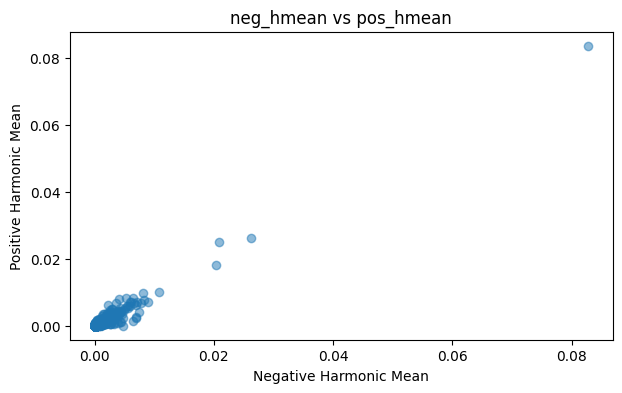

In [39]:
plt.figure(figsize=(7,4))
ax = sns.regplot(x="neg_harmonic_mean", 
                 y="pos_harmonic_mean",
                 fit_reg=False, 
                 scatter_kws={'alpha':0.5},
                 data=term_freq_1)
plt.ylabel('Positive Harmonic Mean')
plt.xlabel('Negative Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')
plt.show()

## I am still not able to find a seperation between the 2 classes. 
## Lets perform CDF : 

In [40]:
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_1['pos_rate_normcdf'] = normcdf(term_freq_1['pos_rate'])
term_freq_1['pos_freq_pct_normcdf'] = normcdf(term_freq_1['pos_freq_pct'])
term_freq_1['pos_normcdf_hmean'] = hmean([term_freq_1['pos_rate_normcdf'], term_freq_1['pos_freq_pct_normcdf']])

term_freq_1.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]

neg  pos  total_count  total  pos_rate  neg_rate  pos_freq_pct  \
oh         233  544          777    777  0.700129  0.299871      0.003038   
thank      139  310          449    449  0.690423  0.309577      0.001731   
anti       117  262          379    379  0.691293  0.308707      0.001463   
indicted    43  146          189    189  0.772487  0.227513      0.000815   
team        46  144          190    190  0.757895  0.242105      0.000804   
morning     37  131          168    168  0.779762  0.220238      0.000732   
great      158  312          470    470  0.663830  0.336170      0.001742   
thanks      76  175          251    251  0.697211  0.302789      0.000977   
political   90  191          281    281  0.679715  0.320285      0.001067   
hypocrisy   38  120          158    158  0.759494  0.240506      0.000670   

           neg_freq_pct  pos_rate_norm  pos_freq_norm  neg_rate_norm  \
oh             0.001163       0.700129       0.066188       0.299871   
thank          0.000694       0.690423       0.037717       0.309577   
anti           0.000584       0.691293       0.031877       0.308707   
indicted       0.000215       0.772487       0.017764       0.227513   
team           0.000230       0.757895       0.017520       0.242105   
morning        0.000185       0.779762       0.015939       0.220238   
great          0.000788       0.663830       0.037961       0.336170   
thanks         0.000379       0.697211       0.021292       0.302789   
political      0.000449       0.679715       0.023239       0.320285   
hypocrisy      0.000190       0.759494       0.014600       0.240506   

           neg_freq_norm  pos_harmonic_mean  neg_harmonic_mean  \
oh              0.025889           0.006050           0.002316   
thank           0.015444           0.003454           0.001384   
anti            0.013000           0.002920           0.001165   
indicted        0.004778           0.001629           0.000429   
team            0.005111           0.001607           0.000459   
morning         0.004111           0.001462           0.000369   
great           0.017556           0.003476           0.001573   
thanks          0.008444           0.001952           0.000758   
political       0.010000           0.002130           0.000897   
hypocrisy       0.004222           0.001339           0.000379   

           pos_rate_normcdf  pos_freq_pct_normcdf  pos_normcdf_hmean  
oh                 0.861079              1.000000           0.925355  
thank              0.850038              0.998240           0.918197  
anti               0.851050              0.992630           0.916404  
indicted           0.926109              0.899684           0.912706  
team               0.915336              0.896124           0.905628  
morning            0.931073              0.870740           0.899896  
great              0.816861              0.998349           0.898532  
thanks             0.857820              0.941733           0.897820  
political          0.837194              0.958126           0.893587  
hypocrisy          0.916571              0.846135           0.879945

In [41]:
term_freq_1.head(1)

neg  pos  total_count  total  pos_rate  neg_rate  pos_freq_pct  \
aa    2    4            6      6  0.666667  0.333333      0.000022   

    neg_freq_pct  pos_rate_norm  pos_freq_norm  neg_rate_norm  neg_freq_norm  \
aa       0.00001       0.666667       0.000487       0.333333       0.000222   

    pos_harmonic_mean  neg_harmonic_mean  pos_rate_normcdf  \
aa           0.000045            0.00002          0.820604   

    pos_freq_pct_normcdf  pos_normcdf_hmean  
aa              0.444753           0.576858

In [42]:
# cumulative distribution function
def cumulative_distribution_function(value):
    return norm.cdf(value, value.mean(), value.std())

# cdf for 'pos_rate' and 'pos_freq_pct'
term_freq_1['norm_pos_rate_cdf'] = cumulative_distribution_function(term_freq_1['pos_rate'])
term_freq_1['norm_pos_frequency_cdf'] = cumulative_distribution_function(term_freq_1['pos_freq_pct'])

# cdf for 'neg_rate' and 'neg_freq_pct'
term_freq_1['norm_neg_rate_cdf'] = cumulative_distribution_function(term_freq_1['neg_rate'])
term_freq_1['norm_neg_frequency_cdf'] = cumulative_distribution_function(term_freq_1['neg_freq_pct'])

# harmonic mean of the two new columns:
term_freq_1['pos_harmonic_mean_norm_cdf'] = hmean([term_freq_1['norm_pos_rate_cdf'], term_freq_1['norm_pos_frequency_cdf']])
term_freq_1['neg_harmonic_mean_norm_cdf'] = hmean([term_freq_1['norm_neg_rate_cdf'], term_freq_1['norm_neg_frequency_cdf']])

# Sort by the harmonic mean column and display the first 10 rows
term_freq_1.sort_values(by='pos_harmonic_mean_norm_cdf', ascending=False).iloc[:10]

neg  pos  total_count  total  pos_rate  neg_rate  pos_freq_pct  \
oh         233  544          777    777  0.700129  0.299871      0.003038   
thank      139  310          449    449  0.690423  0.309577      0.001731   
anti       117  262          379    379  0.691293  0.308707      0.001463   
indicted    43  146          189    189  0.772487  0.227513      0.000815   
team        46  144          190    190  0.757895  0.242105      0.000804   
morning     37  131          168    168  0.779762  0.220238      0.000732   
great      158  312          470    470  0.663830  0.336170      0.001742   
thanks      76  175          251    251  0.697211  0.302789      0.000977   
political   90  191          281    281  0.679715  0.320285      0.001067   
hypocrisy   38  120          158    158  0.759494  0.240506      0.000670   

           neg_freq_pct  pos_rate_norm  pos_freq_norm  ...  neg_harmonic_mean  \
oh             0.001163       0.700129       0.066188  ...           0.002316   
thank          0.000694       0.690423       0.037717  ...           0.001384   
anti           0.000584       0.691293       0.031877  ...           0.001165   
indicted       0.000215       0.772487       0.017764  ...           0.000429   
team           0.000230       0.757895       0.017520  ...           0.000459   
morning        0.000185       0.779762       0.015939  ...           0.000369   
great          0.000788       0.663830       0.037961  ...           0.001573   
thanks         0.000379       0.697211       0.021292  ...           0.000758   
political      0.000449       0.679715       0.023239  ...           0.000897   
hypocrisy      0.000190       0.759494       0.014600  ...           0.000379   

           pos_rate_normcdf  pos_freq_pct_normcdf  pos_normcdf_hmean  \
oh                 0.861079              1.000000           0.925355   
thank              0.850038              0.998240           0.918197   
anti               0.851050              0.992630           0.916404   
indicted           0.926109              0.899684           0.912706   
team               0.915336              0.896124           0.905628   
morning            0.931073              0.870740           0.899896   
great              0.816861              0.998349           0.898532   
thanks             0.857820              0.941733           0.897820   
political          0.837194              0.958126           0.893587   
hypocrisy          0.916571              0.846135           0.879945   

           norm_pos_rate_cdf  norm_pos_frequency_cdf  norm_neg_rate_cdf  \
oh                  0.861079                1.000000           0.138921   
thank               0.850038                0.998240           0.149962   
anti                0.851050                0.992630           0.148950   
indicted            0.926109                0.899684           0.073891   
team                0.915336                0.896124           0.084664   
morning             0.931073                0.870740           0.068927   
great               0.816861                0.998349           0.183139   
thanks              0.857820                0.941733           0.142180   
political           0.837194                0.958126           0.162806   
hypocrisy           0.916571                0.846135           0.083429   

           norm_neg_frequency_cdf  pos_harmonic_mean_norm_cdf  \
oh                       0.973438                    0.925355   
thank                    0.859994                    0.918197   
anti                     0.810708                    0.916404   
indicted                 0.582583                    0.912706   
team                     0.593186                    0.905628   
morning                  0.561203                    0.899896   
great                    0.894867                    0.898532   
thanks                   0.694338                    0.897820   
political                0.737390                    0.893587   
hy

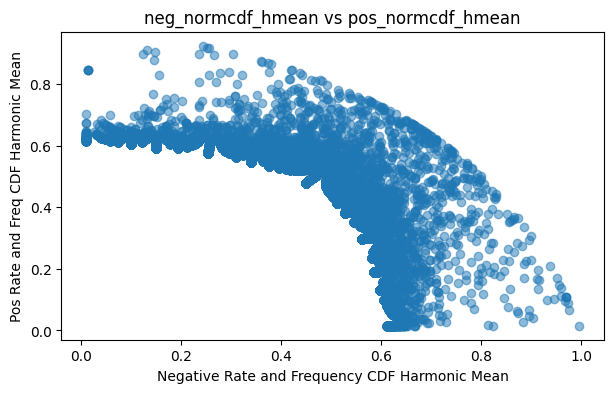

In [43]:
plt.figure(figsize=(7,4))
ax = sns.regplot(x="neg_harmonic_mean_norm_cdf", y="pos_harmonic_mean_norm_cdf",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_1)
plt.ylabel('Pos Rate and Freq CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

plt.show()

In [44]:
fig = px.scatter(term_freq_1, 
                 x="neg_harmonic_mean_norm_cdf", 
                 y="pos_harmonic_mean_norm_cdf", 
                 hover_data=[term_freq_1.index])

fig.update_layout(
    title='Neg NormCDF Harmonic Mean vs Pos NormCDF Harmonic Mean',
    xaxis=dict(title='Negative Rate and Frequency CDF Harmonic Mean'),
    yaxis=dict(title='Pos Rate and Freq CDF Harmonic Mean'),
    hovermode="closest")

fig.show()

## Going through the plot, it is clear that there is a pattern formed where at the top of the curve towards the left it is almost all positive but towards the bottom right its all negative words.